In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarathsai7787","key":"ec682396a281a837478d235897b32a61"}'}

In [2]:
!pip install kaggle

In [3]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download anmolkumar/health-insurance-cross-sell-prediction

Dataset URL: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction
License(s): GPL-2.0


In [5]:
!unzip /content/health-insurance-cross-sell-prediction.zip

Archive:  /content/health-insurance-cross-sell-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
!rm -rf /content/health-insurance-cross-sell-prediction.zip /content/sample_data /content/test.csv /content/sample_submission.csv

In [7]:
!pip install scikit-plot scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/train.csv')
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [2]:
df.shape

(381109, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.dtypes

,0
id,int64
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [5]:
df = df.drop(columns = ['id'])
df.isna().mean() * 100

,0
Gender,0.0
Age,0.0
Driving_License,0.0
Region_Code,0.0
Previously_Insured,0.0
Vehicle_Age,0.0
Vehicle_Damage,0.0
Annual_Premium,0.0
Policy_Sales_Channel,0.0
Vintage,0.0


In [6]:
df.duplicated().sum()

269

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.shape

(380840, 11)

In [8]:
constant_features = [
    feature for feature in df.columns if df[feature].nunique() == 1
]

print(f"Constant features: {constant_features}")

if len(constant_features) > 0:
    df = df.drop(columns=constant_features)
    print(f"Dataframe shape after dropping constant features: {df.shape}")
else:
  print("No constant features found.")

Constant features: []
No constant features found.


In [9]:
df.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [ ]:
df['Response'].value_counts()

,count
Response,
0,334155
1,46685


In [10]:
df_0 = df[df['Response'] == 0].head(1000)
df_1 = df[df['Response'] == 1].head(1000)

df = pd.concat([df_0, df_1], axis=0)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0


In [11]:
df['Response'].value_counts()

,count
Response,
0,1000
1,1000


<Axes: xlabel='Vintage', ylabel='Density'>

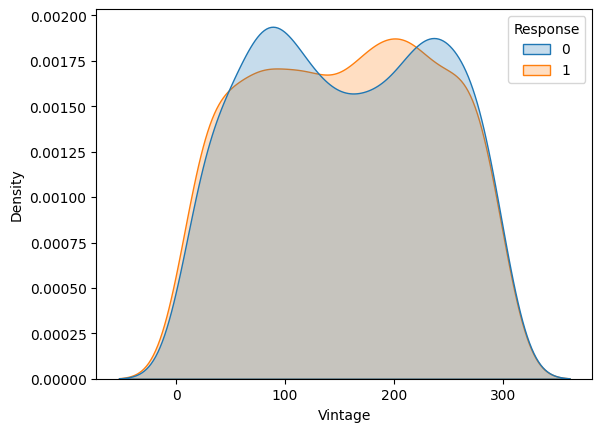

In [ ]:
sns.kdeplot(data=df, x='Vintage', hue='Response', fill=True)

<Axes: xlabel='Policy_Sales_Channel', ylabel='Density'>

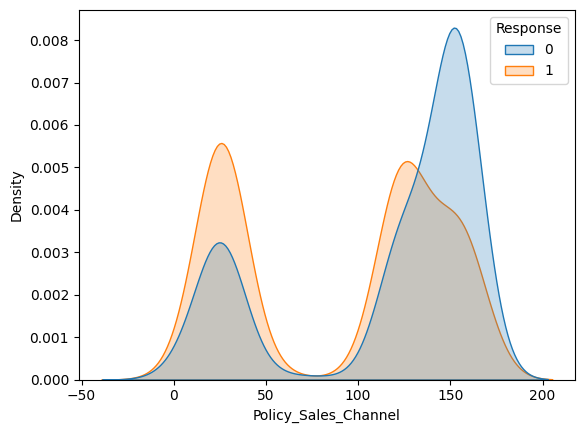

In [ ]:
sns.kdeplot(data=df, x='Policy_Sales_Channel', hue='Response', fill=True)

<Axes: xlabel='Annual_Premium', ylabel='Density'>

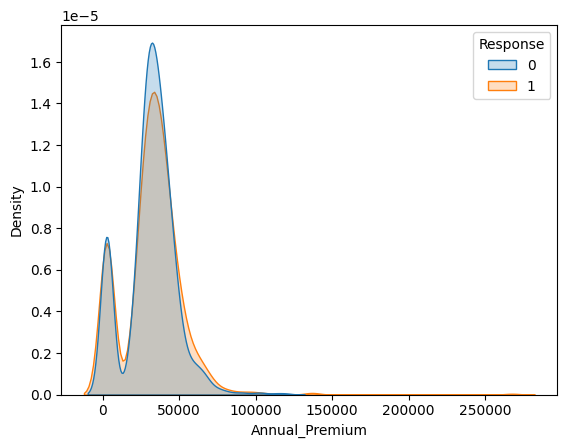

In [ ]:
sns.kdeplot(data=df, x='Annual_Premium', hue='Response', fill=True)

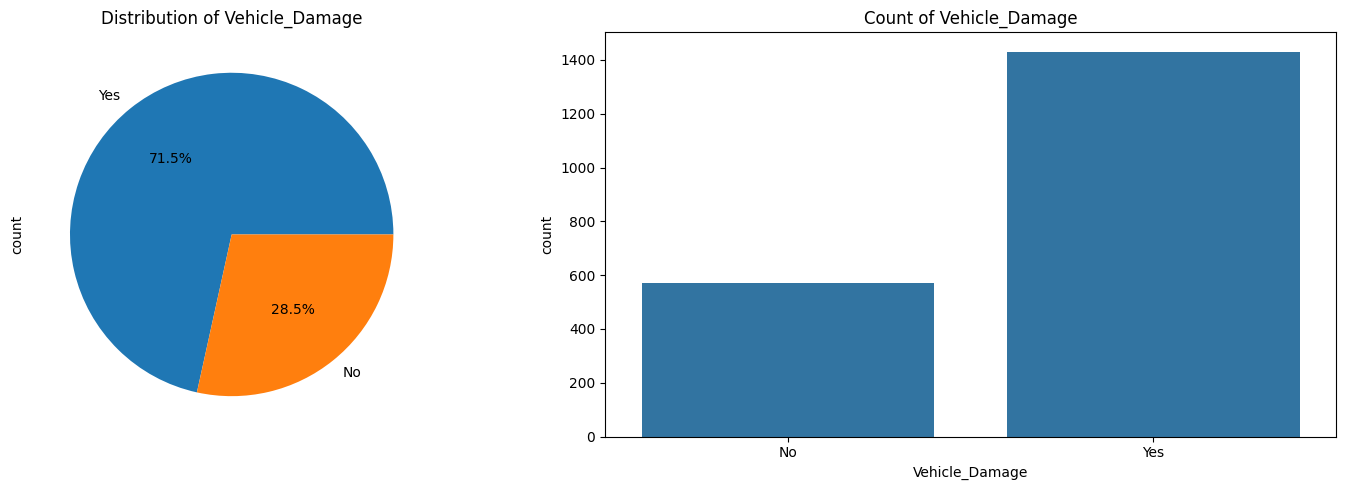

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Vehicle_Damage'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Vehicle_Damage')

# Countplot
sns.countplot(x='Vehicle_Damage', data=df, ax=axes[1])
axes[1].set_title('Count of Vehicle_Damage')

plt.tight_layout()
plt.show()

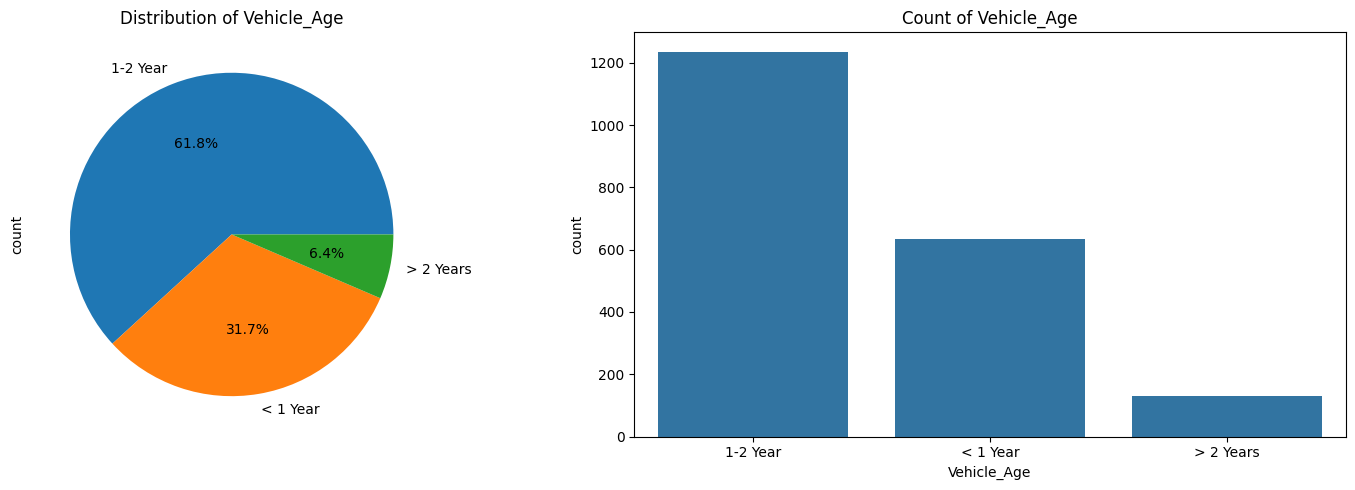

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Vehicle_Age'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Vehicle_Age')

# Countplot
sns.countplot(x='Vehicle_Age', data=df, ax=axes[1])
axes[1].set_title('Count of Vehicle_Age')

plt.tight_layout()
plt.show()

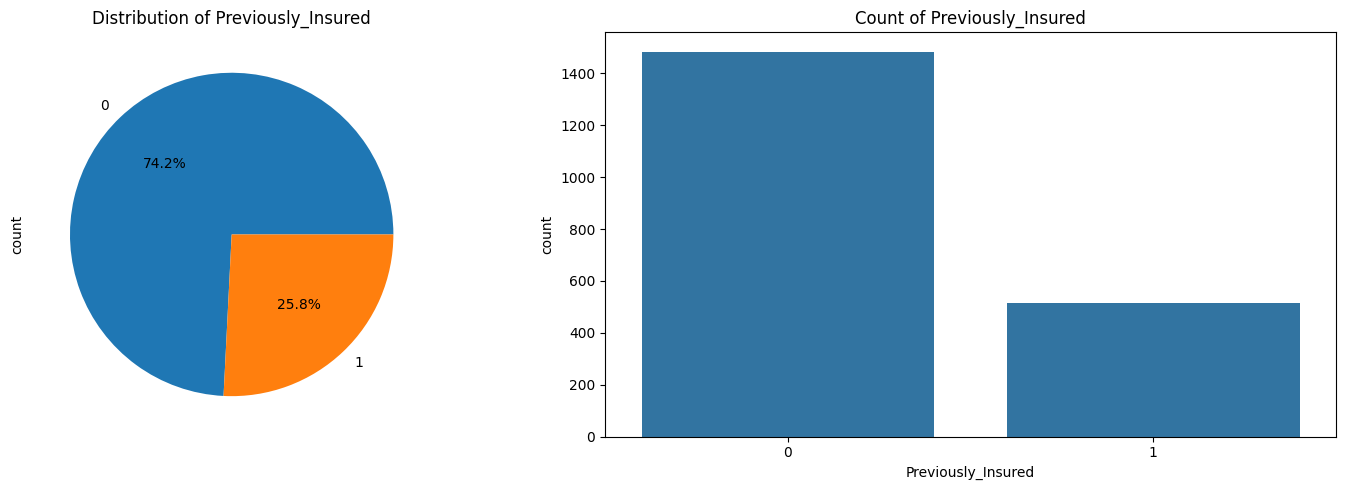

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Previously_Insured'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Previously_Insured')

# Countplot
sns.countplot(x='Previously_Insured', data=df, ax=axes[1])
axes[1].set_title('Count of Previously_Insured')

plt.tight_layout()
plt.show()

In [ ]:
df['Region_Code'].value_counts().head(10)

,count
Region_Code,
28.0,714
8.0,168
46.0,99
41.0,86
3.0,62
30.0,59
15.0,56
29.0,51
36.0,44


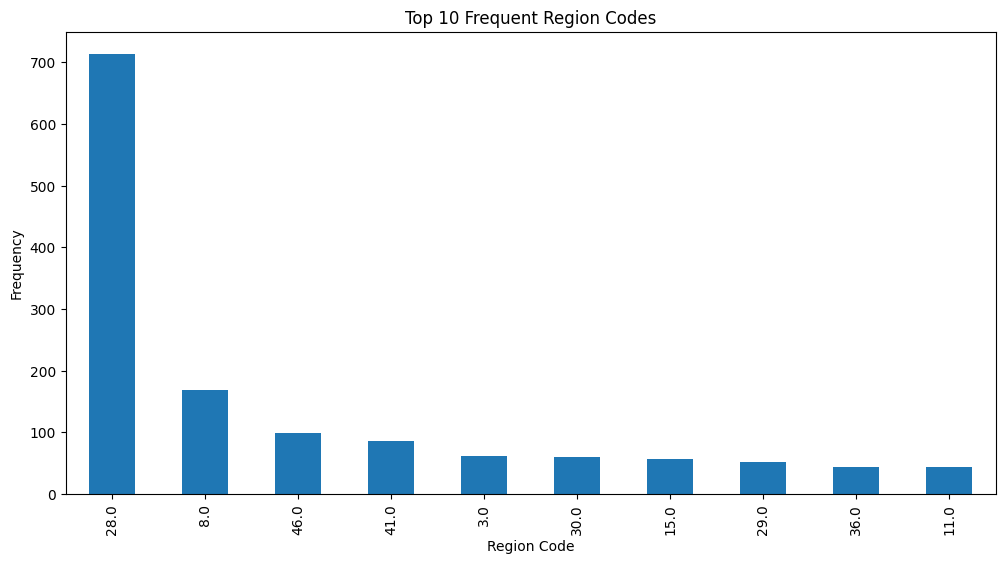

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df['Region_Code'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Frequent Region Codes')
plt.xlabel('Region Code')
plt.ylabel('Frequency')
plt.show()

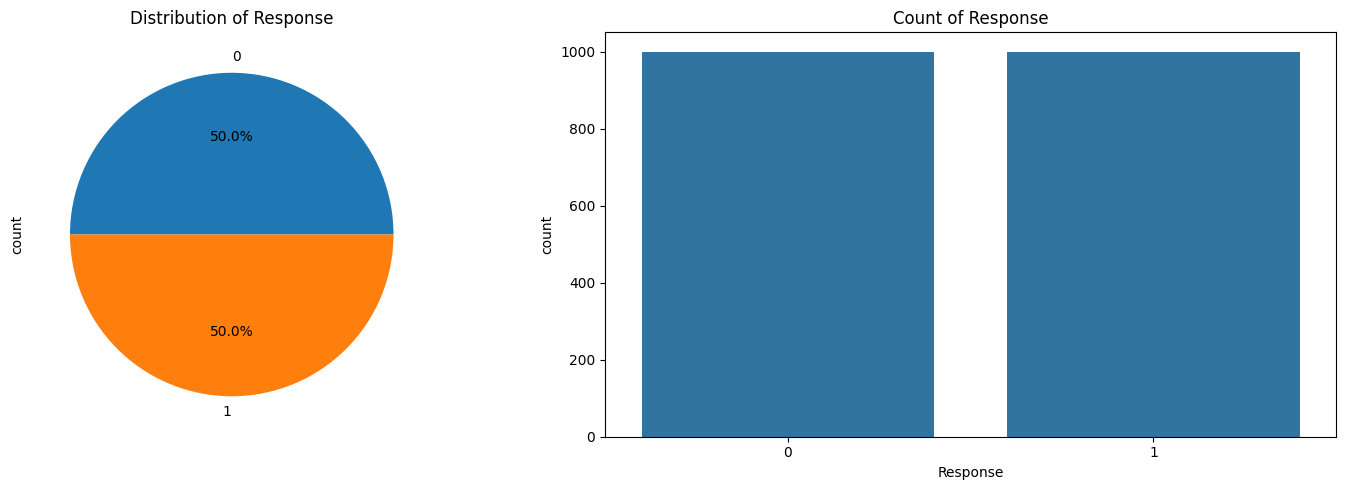

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Response'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Response')

# Countplot
sns.countplot(x='Response', data=df, ax=axes[1])
axes[1].set_title('Count of Response')

plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

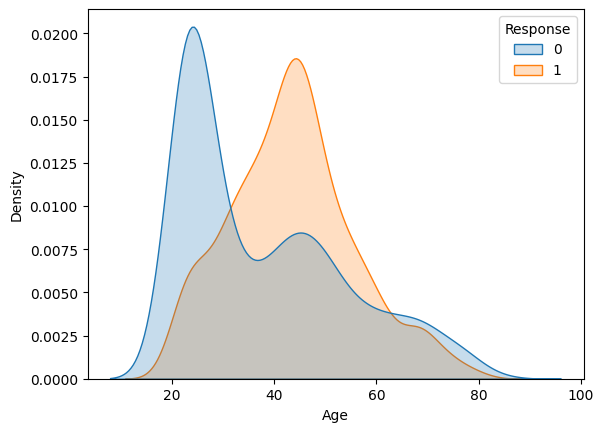

In [ ]:
sns.kdeplot(data=df, x='Age', hue='Response', fill=True)

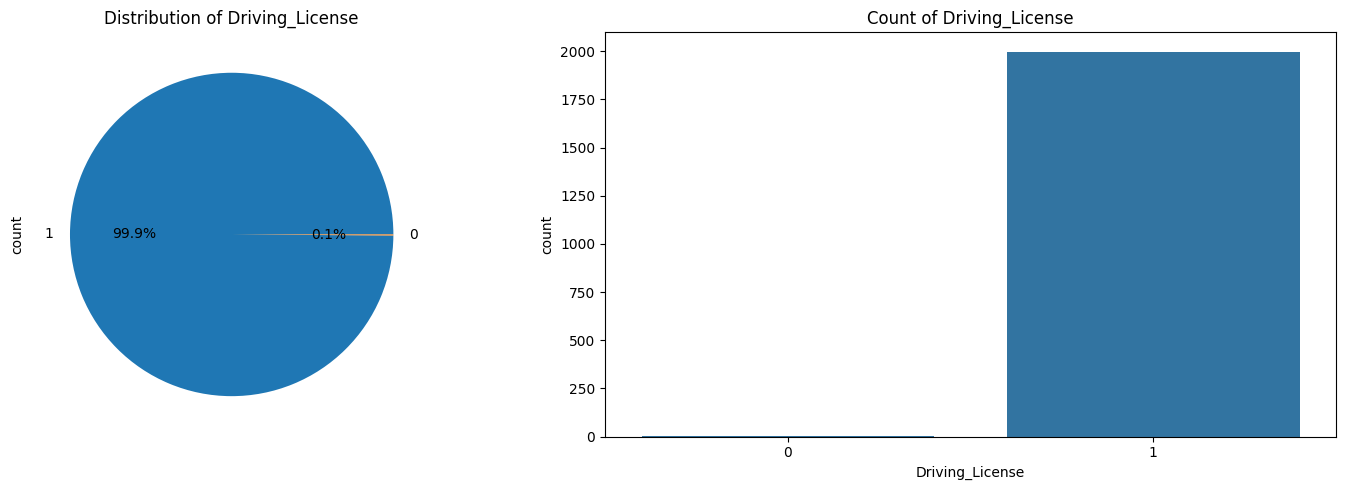

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Driving_License'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Driving_License')

# Countplot
sns.countplot(x='Driving_License', data=df, ax=axes[1])
axes[1].set_title('Count of Driving_License')

plt.tight_layout()
plt.show()

In [ ]:
df.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
8,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0
11,Female,24,1,50.0,1,< 1 Year,No,48699.0,152.0,289,0
12,Female,41,1,15.0,1,1-2 Year,No,31409.0,14.0,221,0
13,Male,76,1,28.0,0,1-2 Year,Yes,36770.0,13.0,15,0


In [13]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')


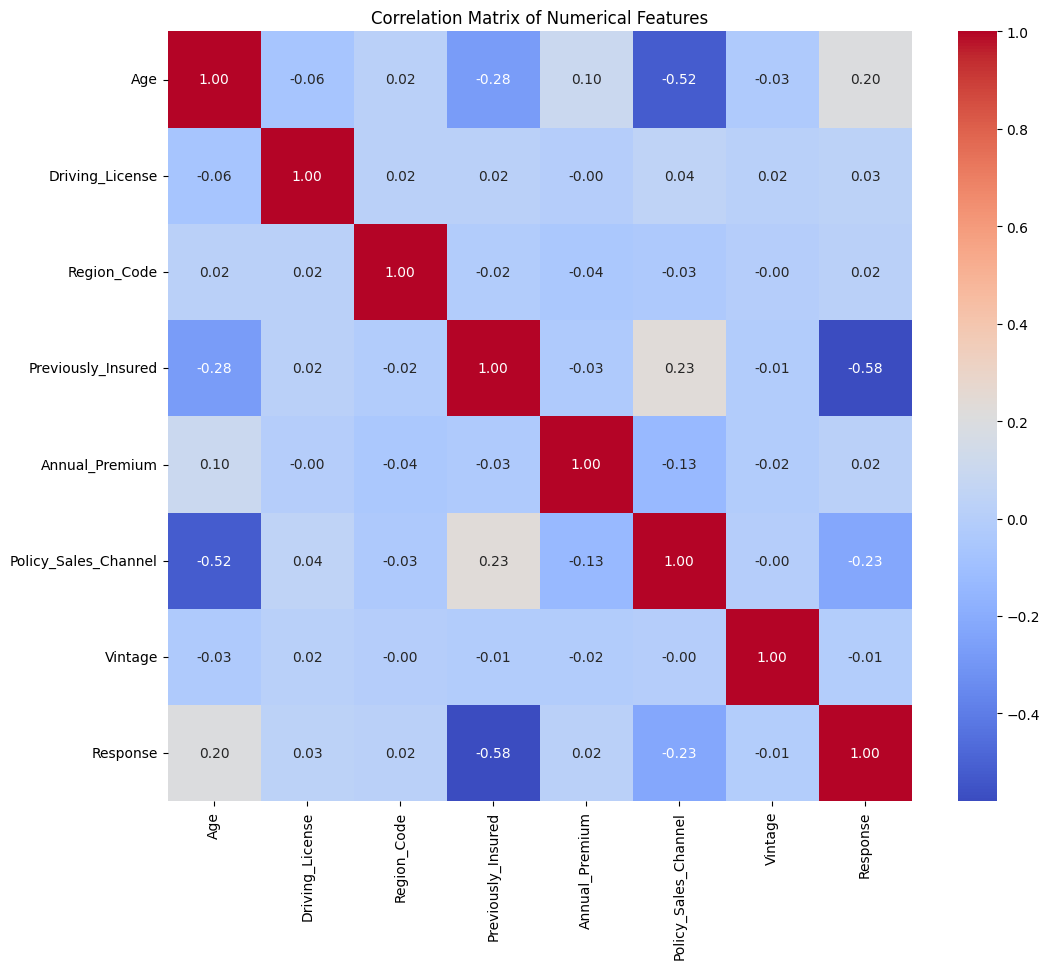

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [14]:
X = df.drop(columns=['Response'])
y = df[['Response']]

In [ ]:
df_columns = X.columns
df_columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [ ]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249


In [ ]:
y.head()

,Response
1,0
3,0
4,0
5,0
6,0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 10), (400, 10), (1600, 1), (400, 1))

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Assuming numerical_columns and categorical_columns are defined as in your previous code
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OrdinalEncoder(), categorical_columns)
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the testing data (important: use transform, not fit_transform)
X_test = preprocessor.transform(X_test)

In [18]:
numerical_columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [19]:
categorical_columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [20]:
X.dtypes

,0
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64
Vintage,int64


In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 10), (400, 10), (1600, 1), (400, 1))

In [22]:
label = y_test['Response'].unique().tolist()
label

[1, 0]

In [23]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report, precision_recall_fscore_support
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.values.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')
    print(f'Weighted Precision: {precision}')
    print(f'Weighted Recall: {recall}')
    print(f'Weighted F1-score: {f1}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time, precision, recall, f1]

Results for LogisticRegression:

Training time (sec) = 1.5764625072479248
Prediction time (sec) = 0.0005230903625488281

Training score = 0.7849999999999999
Testing score = 0.765

No of misclassified for class 1 (test data) = 88
No of misclassified for class 0 (test data) = 6
Total no of misclassified points (test data) = 94
Total % of misclassified points (test data) = 0.235

Training log_loss = 0.4445122160408236
Testing log_loss = 0.4721444052759921

Weighted Precision: 0.8185479023921144
Weighted Recall: 0.765
Weighted F1-score: 0.7546908844176518

Confusion matrix:


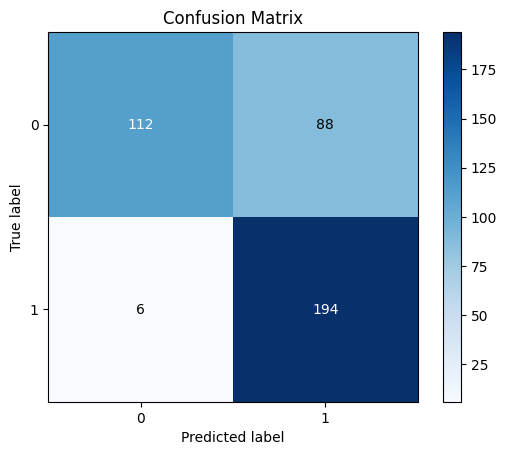

Classification report:

              precision    recall  f1-score   support

           0       0.95      0.56      0.70       200
           1       0.69      0.97      0.80       200

    accuracy                           0.77       400
   macro avg       0.82      0.77      0.75       400
weighted avg       0.82      0.77      0.75       400

**************************************************************************


In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.008170127868652344
Prediction time (sec) = 0.0003266334533691406

Training score = 0.78375
Testing score = 0.765

No of misclassified for class 1 (test data) = 88
No of misclassified for class 0 (test data) = 6
Total no of misclassified points (test data) = 94
Total % of misclassified points (test data) = 0.235

Weighted Precision: 0.8185479023921144
Weighted Recall: 0.765
Weighted F1-score: 0.7546908844176518

Confusion matrix:


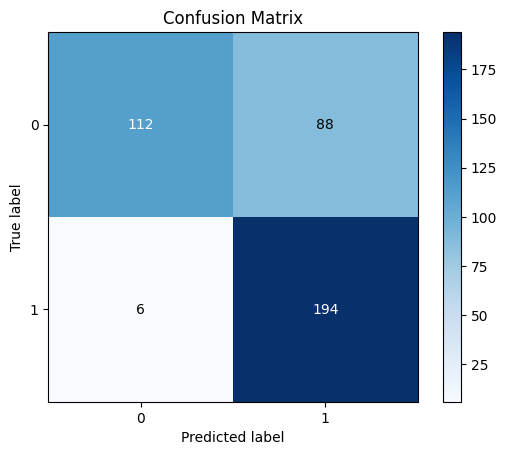

Classification report:

              precision    recall  f1-score   support

           0       0.95      0.56      0.70       200
           1       0.69      0.97      0.80       200

    accuracy                           0.77       400
   macro avg       0.82      0.77      0.75       400
weighted avg       0.82      0.77      0.75       400

**************************************************************************


In [25]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.017428159713745117
Prediction time (sec) = 0.0009903907775878906

Training score = 1.0
Testing score = 0.6924999999999999

No of misclassified for class 1 (test data) = 62
No of misclassified for class 0 (test data) = 61
Total no of misclassified points (test data) = 123
Total % of misclassified points (test data) = 0.3075

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 11.083423417153524

Weighted Precision: 0.6925048126203154
Weighted Recall: 0.6925
Weighted F1-score: 0.6924980781129882

Confusion matrix:


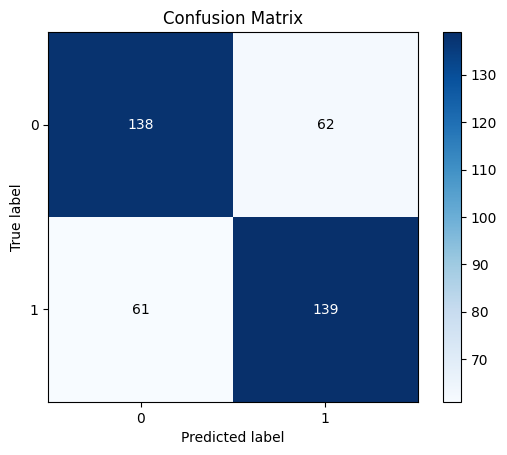

Classification report:

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       200
           1       0.69      0.69      0.69       200

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400

**************************************************************************


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.29769086837768555
Prediction time (sec) = 0.01702117919921875

Training score = 1.0
Testing score = 0.7825

No of misclassified for class 1 (test data) = 60
No of misclassified for class 0 (test data) = 27
Total no of misclassified points (test data) = 87
Total % of misclassified points (test data) = 0.2175

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 0.47375654751715357

Weighted Precision: 0.7904063118398394
Weighted Recall: 0.7825
Weighted F1-score: 0.7810094958813423

Confusion matrix:


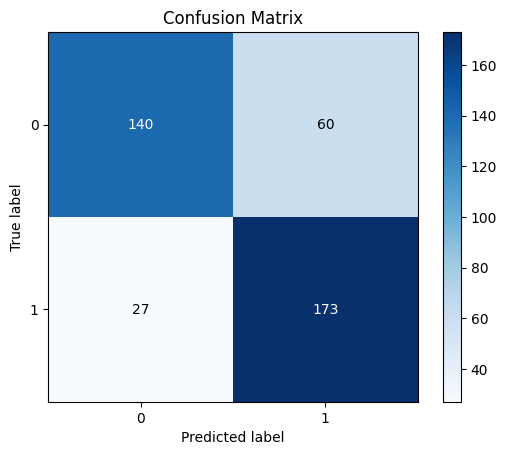

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.70      0.76       200
           1       0.74      0.86      0.80       200

    accuracy                           0.78       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.78      0.78       400

**************************************************************************


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.34720373153686523
Prediction time (sec) = 0.013369560241699219

Training score = 1.0
Testing score = 0.7675000000000001

No of misclassified for class 1 (test data) = 72
No of misclassified for class 0 (test data) = 21
Total no of misclassified points (test data) = 93
Total % of misclassified points (test data) = 0.2325

Training log_loss = 0.1180534971983592
Testing log_loss = 0.5087884456478817

Weighted Precision: 0.7861039065215647
Weighted Recall: 0.7675
Weighted F1-score: 0.7636579647901194

Confusion matrix:


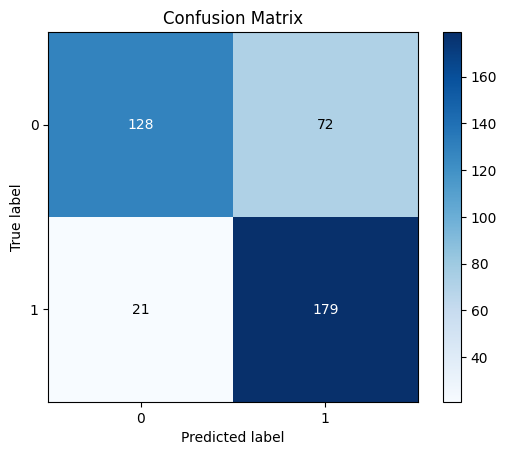

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.64      0.73       200
           1       0.71      0.90      0.79       200

    accuracy                           0.77       400
   macro avg       0.79      0.77      0.76       400
weighted avg       0.79      0.77      0.76       400

**************************************************************************


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

Results for XGBClassifier:

Training time (sec) = 0.14422917366027832
Prediction time (sec) = 0.0018863677978515625

Training score = 0.9918750000000001
Testing score = 0.7649999999999999

No of misclassified for class 1 (test data) = 61
No of misclassified for class 0 (test data) = 33
Total no of misclassified points (test data) = 94
Total % of misclassified points (test data) = 0.235

Training log_loss = 0.10262012548512685
Testing log_loss = 0.6093866726090957

Weighted Precision: 0.770297837617299
Weighted Recall: 0.765
Weighted F1-score: 0.763842829866345

Confusion matrix:


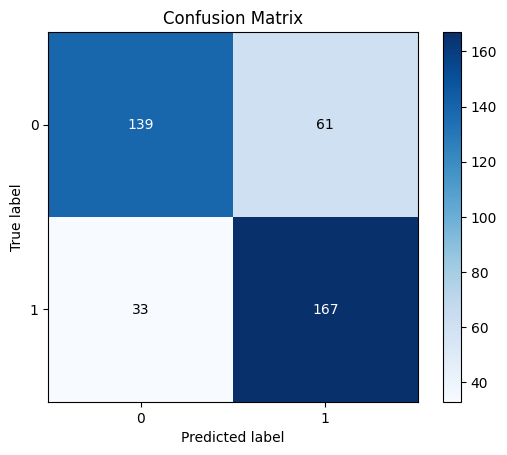

Classification report:

              precision    recall  f1-score   support

           0       0.81      0.69      0.75       200
           1       0.73      0.83      0.78       200

    accuracy                           0.77       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.77      0.77      0.76       400

**************************************************************************


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(class_weight='balanced')
XGB_results = evaluate_model(xgb, X_train, y_train, X_test, y_test, label)

In [27]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results,XGB_results]
s2=['LR','LSVC','DTC','ETC','RFC','XGB']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time','Precision','Recall','F1-score']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

NameError: name 'DTC_results' is not defined

In [ ]:
result = result.sort_values(by='Missclassified-point', ascending=True)
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time,Precision,Recall,F1-score
4,RFC,1.000000,0.8050,78,0.1950,1.202563e-01,0.457613,0.413373,0.016079,0.816423,0.8050,0.803224
1,LSVC,0.779375,0.7825,87,0.2175,NaN,NaN,0.009452,0.000359,0.841276,0.7825,0.772714
3,ETC,1.000000,0.7825,87,0.2175,2.220446e-16,0.473757,0.297691,0.017021,0.790406,0.7825,0.781009
0,LR,0.778750,0.7800,88,0.2200,4.490513e-01,0.463382,1.690749,0.000585,0.833333,0.7800,0.770833
5,XGB,0.991875,0.7650,94,0.2350,1.026201e-01,0.609387,0.144229,0.001886,0.770298,0.7650,0.763843
2,DTC,1.000000,0.6925,123,0.3075,2.220446e-16,11.083423,0.017428,0.000990,0.692505,0.6925,0.692498


In [28]:
rfc

RandomForestClassifier(class_weight='balanced')

In [29]:
# Assuming rf_model is your trained Random Forest model
importances = rfc.feature_importances_

# Assuming your feature names are stored in a list `feature_names`
feature_names = df_columns  # Or a list of feature names if you have them separately

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

NameError: name 'df_columns' is not defined

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

NameError: name 'feature_importance_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [31]:
rfc

RandomForestClassifier(class_weight='balanced')

In [32]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')),
                                ('cat', OrdinalEncoder(),
                                 Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object'))])

In [33]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(preprocessor, rfc)
joblib.dump(pipeline, 'insurance_sell_prediction_pipeline.joblib')

['insurance_sell_prediction_pipeline.joblib']

## Prediction

In [34]:
import joblib
pipeline = joblib.load('insurance_sell_prediction_pipeline.joblib')

In [35]:
import numpy as np

def predict_insurance(d):
    df = pd.DataFrame([d])
    pred = pipeline.predict(df)
    prob = np.max(pipeline.predict_proba(df))
    return pred, round(prob,2)

In [36]:
d = X.head(1).to_dict(orient='index')[1]
d

{'Gender': 'Male',
 'Age': 76,
 'Driving_License': 1,
 'Region_Code': 3.0,
 'Previously_Insured': 0,
 'Vehicle_Age': '1-2 Year',
 'Vehicle_Damage': 'No',
 'Annual_Premium': 33536.0,
 'Policy_Sales_Channel': 26.0,
 'Vintage': 183}

In [37]:
pred, prob = predict_insurance(d)
print(f'Prediction: {pred[0]}')
print(f'Probability: {prob}')

Prediction: 0
Probability: 0.98


In [38]:
# Assuming this comes after your sample prediction
# Your existing code has X, y, X_train, X_test, y_train, y_test, pipeline defined

# Debug: Check type and sample of X_test
print("Type of X_test before fairness evaluation:", type(X_test))
print("Sample of X_test before fairness evaluation:\n", X_test[:5])

# Function to evaluate fairness
def evaluate_fairness(X_test_raw, y_test, pipeline, sensitive_attr='Gender'):
    if not isinstance(X_test_raw, pd.DataFrame):
        raise ValueError("X_test_raw must be a pandas DataFrame with untransformed data")

    if sensitive_attr in X_test_raw.columns:
        print(f"Unique values in {sensitive_attr}:", X_test_raw[sensitive_attr].unique())

    y_pred = pipeline.predict(X_test_raw)
    test_df = X_test_raw.copy()
    test_df['True_Label'] = y_test.values
    test_df['Prediction'] = y_pred

    fairness_metrics = {}
    for group in test_df[sensitive_attr].unique():
        group_df = test_df[test_df[sensitive_attr] == group]
        total = len(group_df)
        positive_pred = group_df['Prediction'].sum()
        true_positive = len(group_df[(group_df['Prediction'] == 1) & (group_df['True_Label'] == 1)])
        actual_positive = group_df['True_Label'].sum()

        demo_parity = positive_pred / total if total > 0 else 0
        equal_opp = true_positive / actual_positive if actual_positive > 0 else 0

        fairness_metrics[group] = {
            'Demographic Parity': demo_parity,
            'Equal Opportunity': equal_opp,
            'Count': total
        }

    return fairness_metrics

# Reconstruct X_test_raw safely
try:
    # If df still has 'id', use test_indices (if available)
    X_test_raw = df.drop(columns=['id', 'Response'], errors='ignore').iloc[test_indices]
except NameError:
    # If test_indices isn’t available or df is altered, reload or re-split
    print("Test indices not found or df altered, re-splitting from raw data...")
    df_raw = pd.read_csv('train.csv')  # Reload original data
    df_raw = df_raw.drop_duplicates()
    X = df_raw.drop(columns=['id', 'Response'])
    y = df_raw['Response']
    X_train, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Fairness Evaluation of Original Model:")
fairness_before = evaluate_fairness(X_test_raw, y_test, pipeline)
for group, metrics in fairness_before.items():
    print(f"{group}:")
    print(f"  Demographic Parity: {metrics['Demographic Parity']:.4f}")
    print(f"  Equal Opportunity: {metrics['Equal Opportunity']:.4f}")
    print(f"  Sample Size: {metrics['Count']}")
demo_diff = abs(fairness_before['Male']['Demographic Parity'] - fairness_before['Female']['Demographic Parity'])
opp_diff = abs(fairness_before['Male']['Equal Opportunity'] - fairness_before['Female']['Equal Opportunity'])
print(f"Difference in Demographic Parity: {demo_diff:.4f}")
print(f"Difference in Equal Opportunity: {opp_diff:.4f}")

Type of X_test before fairness evaluation: <class 'numpy.ndarray'>
Sample of X_test before fairness evaluation:
 [[ 0.2503856   0.03537746  0.10860307 -0.59660054  0.61831661  0.35332457
  -1.0160565   1.          0.          1.        ]
 [ 0.52525143  0.03537746  0.10860307 -0.59660054 -0.38084252  0.35332457
  -1.74840896  1.          2.          1.        ]
 [ 0.59396789  0.03537746  1.58466185 -0.59660054 -0.31443959 -1.40032486
   0.32859064  0.          0.          1.        ]
 [ 1.07498311  0.03537746  0.10860307 -0.59660054  0.01467846 -1.40032486
   0.31658486  1.          0.          1.        ]
 [-1.05522712  0.03537746  0.84663246 -0.59660054 -1.59145263  0.85436727
   1.10896622  0.          1.          1.        ]]
Test indices not found or df altered, re-splitting from raw data...
Fairness Evaluation of Original Model:
Unique values in Gender: ['Female' 'Male']
Female:
  Demographic Parity: 0.3047
  Equal Opportunity: 0.8492
  Sample Size: 34954
Male:
  Demographic Parit

In [ ]:
# Install SHAP if not already installed (e.g., in Colab)
!pip install shap

# Import statements
import numpy as np                # For numerical operations (e.g., SHAP adjustments)
import pandas as pd               # For data handling (e.g., DataFrames)
from sklearn.metrics import accuracy_score  # For accuracy calculation
from sklearn.model_selection import train_test_split  # For splitting data
import joblib                     # For loading the saved pipeline
import shap                       # For SHAP explanations (core of "FairShap")
rf_model = pipeline.named_steps['randomforestclassifier']
X_test_transformed = pipeline.named_steps['columntransformer'].transform(X_test_raw)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_transformed)

# FairShap: Reduce Gender's impact (post-hoc adjustment)
gender_idx = list(X.columns).index('Gender')
adjusted_shap_values = shap_values.copy()
adjusted_shap_values[1][:, gender_idx] *= 0.5  # Reduce Gender's contribution to class 1 by 50%

# Recalculate predictions from adjusted SHAP values
base_value = explainer.expected_value[1]  # Base value for class 1
adjusted_probs = base_value + adjusted_shap_values[1].sum(axis=1)
y_pred_adjusted = (adjusted_probs > 0.5).astype(int)

# Evaluate fairness after adjustment
print("\nFairness Evaluation After FairShap Adjustment:")
fairness_after = evaluate_fairness(X_test_raw, y_test, y_pred_adjusted)
for group, metrics in fairness_after.items():
    print(f"{group}:")
    print(f"  Demographic Parity: {metrics['Demographic Parity']:.4f}")
    print(f"  Equal Opportunity: {metrics['Equal Opportunity']:.4f}")
    print(f"  Sample Size: {metrics['Count']}")
demo_diff_after = abs(fairness_after['Male']['Demographic Parity'] - fairness_after['Female']['Demographic Parity'])
opp_diff_after = abs(fairness_after['Male']['Equal Opportunity'] - fairness_after['Female']['Equal Opportunity'])
print(f"Difference in Demographic Parity: {demo_diff_after:.4f}")
print(f"Difference in Equal Opportunity: {opp_diff_after:.4f}")
print(f"Adjusted Accuracy: {accuracy_score(y_test, y_pred_adjusted):.4f}")

# Optional: Visualize SHAP summary for class 1
shap.summary_plot(shap_values[1], X_test_transformed, feature_names=X.columns)


Fairness Evaluation After FairShap Adjustment:
Unique values in Gender: ['Female' 'Male']


AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [39]:
# Assuming prior code has df, X, y, X_train, X_test, y_train, y_test, pipeline defined

# Reconstruct raw X_train and X_test if they are transformed
print("Type of X_train:", type(X_train))
print("Type of X_test:", type(X_test))

# If X_train/X_test are NumPy arrays, re-split from raw data
if not isinstance(X_train, pd.DataFrame) or not isinstance(X_test, pd.DataFrame):
    print("Reconstructing raw X_train and X_test from original data...")
    df_raw = pd.read_csv('train.csv')
    df_raw = df_raw.drop_duplicates()
    X = df_raw.drop(columns=['id', 'Response'])
    y = df_raw['Response']
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train_raw = X_train
    X_test_raw = X_test

# Function to compute reweighing weights
def compute_reweighing_weights(X, y, sensitive_attr='Gender'):
    if not isinstance(X, pd.DataFrame):
        raise ValueError("X must be a pandas DataFrame with untransformed data")

    df = X.copy()
    df['Label'] = y.values

    overall_positive_rate = y.mean()
    weights = np.ones(len(X))

    for group in ['Male', 'Female']:
        group_df = df[df[sensitive_attr] == group]
        group_positive_rate = group_df['Label'].mean()

        if group_positive_rate > 0:
            if group == 'Male':  # Assuming Male as privileged
                weights[df[sensitive_attr] == group] = overall_positive_rate / group_positive_rate
            else:
                weights[df[sensitive_attr] == group] = (1 - overall_positive_rate) / (1 - group_positive_rate)

    return weights

# Apply reweighing and retrain
weights = compute_reweighing_weights(X_train_raw, y_train)
pipeline.fit(X_train_raw, y_train, randomforestclassifier__sample_weight=weights)
joblib.dump(pipeline, 'insurance_selljunction_fair_pipeline.joblib')

# Function to evaluate fairness (from previous fix)
def evaluate_fairness(X_test_raw, y_test, pipeline, sensitive_attr='Gender'):
    if not isinstance(X_test_raw, pd.DataFrame):
        raise ValueError("X_test_raw must be a pandas DataFrame with untransformed data")

    if sensitive_attr in X_test_raw.columns:
        print(f"Unique values in {sensitive_attr}:", X_test_raw[sensitive_attr].unique())

    y_pred = pipeline.predict(X_test_raw)
    test_df = X_test_raw.copy()
    test_df['True_Label'] = y_test.values
    test_df['Prediction'] = y_pred

    fairness_metrics = {}
    for group in test_df[sensitive_attr].unique():
        group_df = test_df[test_df[sensitive_attr] == group]
        total = len(group_df)
        positive_pred = group_df['Prediction'].sum()
        true_positive = len(group_df[(group_df['Prediction'] == 1) & (group_df['True_Label'] == 1)])
        actual_positive = group_df['True_Label'].sum()

        demo_parity = positive_pred / total if total > 0 else 0
        equal_opp = true_positive / actual_positive if actual_positive > 0 else 0

        fairness_metrics[group] = {
            'Demographic Parity': demo_parity,
            'Equal Opportunity': equal_opp,
            'Count': total
        }

    return fairness_metrics

# Evaluate fairness of improved model
print("\nFairness Evaluation of Improved Model:")
fairness_after = evaluate_fairness(X_test_raw, y_test, pipeline)
for group, metrics in fairness_after.items():
    print(f"{group}:")
    print(f"  Demographic Parity: {metrics['Demographic Parity']:.4f}")
    print(f"  Equal Opportunity: {metrics['Equal Opportunity']:.4f}")
    print(f"  Sample Size: {metrics['Count']}")
demo_diff_after = abs(fairness_after['Male']['Demographic Parity'] - fairness_after['Female']['Demographic Parity'])
opp_diff_after = abs(fairness_after['Male']['Equal Opportunity'] - fairness_after['Female']['Equal Opportunity'])
print(f"Difference in Demographic Parity (After): {demo_diff_after:.4f}")
print(f"Difference in Equal Opportunity (After): {opp_diff_after:.4f}")

Type of X_train: <class 'pandas.core.frame.DataFrame'>
Type of X_test: <class 'numpy.ndarray'>
Reconstructing raw X_train and X_test from original data...

Fairness Evaluation of Improved Model:
Unique values in Gender: ['Female' 'Male']
Female:
  Demographic Parity: 0.0287
  Equal Opportunity: 0.1001
  Sample Size: 34954
Male:
  Demographic Parity: 0.0385
  Equal Opportunity: 0.0983
  Sample Size: 41268
Difference in Demographic Parity (After): 0.0098
Difference in Equal Opportunity (After): 0.0018


In [40]:
from sklearn.metrics import accuracy_score
import joblib
import os

# Load the fair pipeline
fair_pipeline_file = 'insurance_selljunction_fair_pipeline.joblib'
if not os.path.exists(fair_pipeline_file):
    print(f"Error: {fair_pipeline_file} not found. Please ensure the fair model was saved.")
else:
    fair_pipeline = joblib.load(fair_pipeline_file)

    # Calculate accuracy for the fair model
    y_pred_fair = fair_pipeline.predict(X_test_raw)
    accuracy_fair = accuracy_score(y_test, y_pred_fair)
    print(f"Accuracy of Improved (Fair) Model: {accuracy_fair:.4f}")

Accuracy of Improved (Fair) Model: 0.8658


In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import joblib
from scipy.special import softmax

# Load the dataset (as per the document)
df = pd.read_csv('/content/train.csv')
df = df.drop_duplicates()
df = df.drop(columns=['id'])  # Assuming id is dropped as shape changes from 12 to 11

# Subsample for balanced classes (as per Page 7)
df_0 = df[df['Response'] == 0].head(1000)
df_1 = df[df['Response'] == 1].head(1000)
df = pd.concat([df_0, df_1], axis=0)

# Features and target
X = df.drop(columns=['Response'])
y = df['Response']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor and classifier (as per Page 36)
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OrdinalEncoder(), categorical_cols)
    ]
)
rfc = RandomForestClassifier(class_weight='balanced')
pipeline = make_pipeline(preprocessor, rfc)

# Train the model (implied in the document before saving)
pipeline.fit(X_train, y_train)

# Save the model (as per Page 36)
joblib.dump(pipeline, 'insurance_selljunction_pipeline.joblib')

# Load the model
pipeline = joblib.load('insurance_selljunction_pipeline.joblib')

# Compute ECE (Expected Calibration Error)
def compute_ece(y_true, y_prob, n_bins=10):
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    confidences = np.max(y_prob, axis=1)
    predictions = np.argmax(y_prob, axis=1)
    accuracies = (predictions == y_true).astype(float)

    ece = 0.0
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = (confidences > bin_lower) & (confidences <= bin_upper)
        prop_in_bin = np.mean(in_bin)
        if prop_in_bin > 0:
            accuracy_in_bin = np.mean(accuracies[in_bin])
            confidence_in_bin = np.mean(confidences[in_bin])
            ece += prop_in_bin * np.abs(accuracy_in_bin - confidence_in_bin)
    return ece

In [46]:
# Temperature scaling function (adjusted for probabilities)
def temperature_scale(probs, temperature):
    # Convert probabilities to logits
    logits = np.log(probs + 1e-10)  # Avoid log(0)
    # Apply temperature scaling and convert back to probabilities
    scaled_logits = logits / temperature
    return softmax(scaled_logits, axis=1)

# Get probabilities from the original model
y_prob_original = pipeline.predict_proba(X_test)

# Compute ECE for original probabilities
ece_original = compute_ece(y_test.values, y_prob_original)
print(f"ECE for Original Model: {ece_original:.4f}")

# Apply temperature scaling
temperatures = [0.5, 1.0, 1.5, 2.0]
best_temp, best_ece = 1.0, ece_original

for temp in temperatures:
    scaled_probs = temperature_scale(y_prob_original, temp)
    ece_temp = compute_ece(y_test.values, scaled_probs)
    if ece_temp < best_ece:
        best_ece = ece_temp
        best_temp = temp

print(f"Best Temperature: {best_temp}, ECE: {best_ece:.4f}")

# Apply best temperature scaling
scaled_probs = temperature_scale(y_prob_original, best_temp)
y_pred_scaled = np.argmax(scaled_probs, axis=1)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy of Scaled Model: {acc_scaled:.4f}")

# Original accuracy for comparison
y_pred_original = pipeline.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy of Original Model: {acc_original:.4f}")

ECE for Original Model: 0.0496
Best Temperature: 1.5, ECE: 0.0344
Accuracy of Scaled Model: 0.7725
Accuracy of Original Model: 0.7725


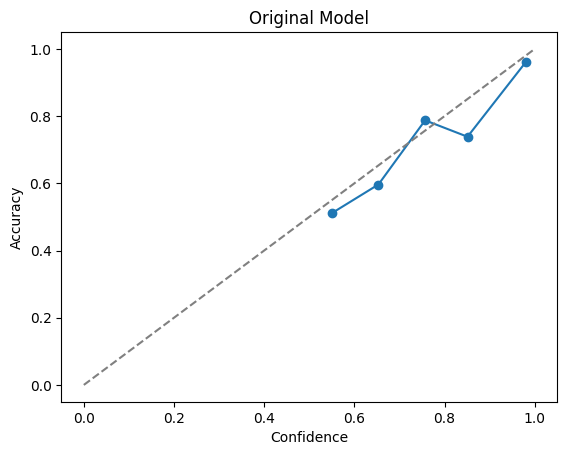

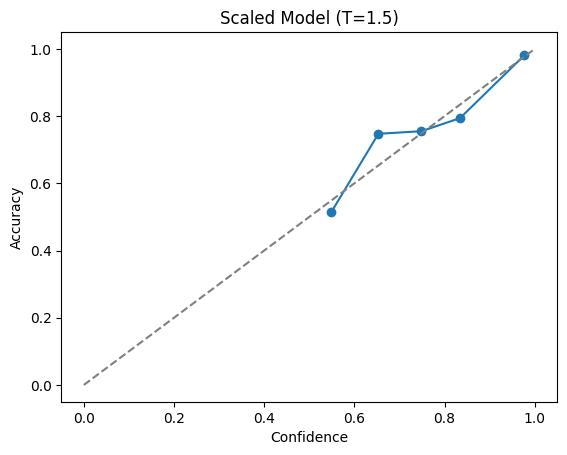

In [47]:
import matplotlib.pyplot as plt

def plot_reliability_diagram(y_true, y_prob, title):
    confidences = np.max(y_prob, axis=1)
    predictions = np.argmax(y_prob, axis=1)
    bins = np.linspace(0, 1, 11)
    bin_accuracies = []
    bin_confidences = []
    for i in range(len(bins)-1):
        in_bin = (confidences > bins[i]) & (confidences <= bins[i+1])
        if np.sum(in_bin) > 0:
            bin_accuracies.append(np.mean((predictions == y_true)[in_bin]))
            bin_confidences.append(np.mean(confidences[in_bin]))
    plt.plot(bin_confidences, bin_accuracies, marker='o')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('Confidence')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.show()

plot_reliability_diagram(y_test, y_prob_original, 'Original Model')
plot_reliability_diagram(y_test, scaled_probs, 'Scaled Model (T=1.5)')

In [48]:
X_test_ood = X_test.copy()
X_test_ood['Annual_Premium'] *= 1.2
y_prob_ood = pipeline.predict_proba(X_test_ood)
ece_ood = compute_ece(y_test, y_prob_ood)
scaled_probs_ood = temperature_scale(y_prob_ood, best_temp)
ece_ood_scaled = compute_ece(y_test, scaled_probs_ood)
print(f"ECE OOD Original: {ece_ood:.4f}, Scaled: {ece_ood_scaled:.4f}")

ECE OOD Original: 0.0421, Scaled: 0.0322


In [ ]:
X.to_csv("sample_data.csv",index=False)

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the prediction pipeline
pipeline = joblib.load('insurance_sell_prediction_pipeline.joblib')

# Load sample data to infer types and ranges
sample_data = pd.read_csv('/content/sample_data.csv')

numerical_columns = sample_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = sample_data.select_dtypes(include=['object']).columns.tolist()

def get_column_info(df):
    column_info = {}
    for col in df.columns:
        if col in numerical_columns:
            column_info[col] = {
                'dtype': df[col].dtype,
                'min': df[col].min(),
                'max': df[col].max()
            }
        elif col in categorical_columns:
            column_info[col] = {
                'dtype': df[col].dtype,
                'unique': df[col].unique().tolist()
            }
    return column_info

column_info = get_column_info(sample_data)

def predict_insurance(d):
    df = pd.DataFrame([d])
    pred = pipeline.predict(df)
    prob = np.max(pipeline.predict_proba(df))
    return pred[0], round(prob, 2)

# Streamlit UI
st.title("Insurance Sell Prediction")

user_input = {}
for col, info in column_info.items():
    if info['dtype'] in ['int64', 'float64']:
        user_input[col] = st.number_input(f"{col}", min_value=info['min'], max_value=info['max'], value=info['min'])
    else:
        user_input[col] = st.selectbox(f"{col}", options=info['unique'])

if st.button("Predict"):
    prediction, probability = predict_insurance(user_input)
    st.write(f'Prediction: {prediction}')
    st.write(f'Probability: {probability}')


Writing app.py


In [ ]:
from pyngrok import ngrok

ngrok_key = "2t2aJFPi51AyTYLCWsAzwdbCkon_4RGJKMvMDe9DxHNuGyDLN"
port = 8501

ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

'https://a927-34-170-177-156.ngrok-free.app'

In [ ]:
!rm -rf logs.txt && streamlit run app.py &>/content/logs.txt